In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 

In [2]:
data = pd.read_csv("C:/Users/Admin/Desktop/Machine Learning/Project_ML_DL/Assignment_1/customer_churn.csv")

In [3]:
#Read the dataset into a data frame and name it df
df = pd.DataFrame(data)

In [4]:
#Show the last 10 observations of df
df.tail(10)

,User_ID,User_Gender,Is_Senior,Has_Partner,Has_Children,Usage_Length,Has_Phone_Service,Multiple_Lines,Intnet_Provider,Has_Security_Service,Has_Online_Backup,Has_Device_Protection,Has_Tech_Support,Has_Steam_TV,Has_Steam_Movies,Contract_Type,Has_Paperless_Billing,Payment_Method,Monthly_Fee,Attrition
690,690,F,No,Yes,Yes,72,Yes,Yes,DSL,No,No,Yes,No,Yes,No,Two year,Yes,Bank transfer (automatic),51.20,No
691,691,M,No,Yes,No,23,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,No,Electronic check,56.17,No
692,692,F,No,Yes,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,Month-to-month,No,Bank transfer (automatic),13.00,No
693,693,M,No,No,No,20,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,45.80,No
694,694,M,No,Yes,No,66,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,One year,No,Electronic check,63.53,No
695,695,M,No,Yes,Yes,57,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,39.73,No
696,696,M,No,Yes,No,54,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),73.17,Yes
697,697,M,No,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No,Two year,No,Credit card (automatic),13.23,No
698,698,F,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),68.63,Yes
699,699,M,No,No,No,20,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,56.83,Yes


In [5]:
df.User_Gender.value_counts()

M    358
F    342
Name: User_Gender, dtype: int64

In [6]:
#Delete the column User_ID from df
del df['User_ID']

In [7]:
#Show the shape of df 
df.shape

(700, 19)

In [8]:
#Show the data types of each column in df and convert the object columns to categorical variables
df.dtypes

User_Gender               object
Is_Senior                 object
Has_Partner               object
Has_Children              object
Usage_Length               int64
Has_Phone_Service         object
Multiple_Lines            object
Intnet_Provider           object
Has_Security_Service      object
Has_Online_Backup         object
Has_Device_Protection     object
Has_Tech_Support          object
Has_Steam_TV              object
Has_Steam_Movies          object
Contract_Type             object
Has_Paperless_Billing     object
Payment_Method            object
Monthly_Fee              float64
Attrition                 object
dtype: object

In [9]:
cat = df.select_dtypes('object')
cat.dtypes

User_Gender              object
Is_Senior                object
Has_Partner              object
Has_Children             object
Has_Phone_Service        object
Multiple_Lines           object
Intnet_Provider          object
Has_Security_Service     object
Has_Online_Backup        object
Has_Device_Protection    object
Has_Tech_Support         object
Has_Steam_TV             object
Has_Steam_Movies         object
Contract_Type            object
Has_Paperless_Billing    object
Payment_Method           object
Attrition                object
dtype: object

In [10]:
cat_data=cat.astype('category')

In [11]:
cat_data.dtypes

User_Gender              category
Is_Senior                category
Has_Partner              category
Has_Children             category
Has_Phone_Service        category
Multiple_Lines           category
Intnet_Provider          category
Has_Security_Service     category
Has_Online_Backup        category
Has_Device_Protection    category
Has_Tech_Support         category
Has_Steam_TV             category
Has_Steam_Movies         category
Contract_Type            category
Has_Paperless_Billing    category
Payment_Method           category
Attrition                category
dtype: object

In [12]:
num_data = df.select_dtypes('int64')
float_data = df.select_dtypes('float64')

In [13]:
df = pd.concat([cat_data,num_data,float_data], axis=1)
df.dtypes

User_Gender              category
Is_Senior                category
Has_Partner              category
Has_Children             category
Has_Phone_Service        category
Multiple_Lines           category
Intnet_Provider          category
Has_Security_Service     category
Has_Online_Backup        category
Has_Device_Protection    category
Has_Tech_Support         category
Has_Steam_TV             category
Has_Steam_Movies         category
Contract_Type            category
Has_Paperless_Billing    category
Payment_Method           category
Attrition                category
Usage_Length                int64
Monthly_Fee               float64
dtype: object

In [14]:
#Summarise the numerical variables in df (e.g., number of observations, mean, standard deviations, min value,
# max value, etc.) and check if the numerical variables are linearly correlated
df.describe()

,Usage_Length,Monthly_Fee
count,700.000000,700.000000
mean,34.117143,42.817771
std,25.329768,20.472124
min,0.000000,12.500000
25%,10.000000,20.110000
50%,32.000000,46.850000
75%,60.000000,59.772500
max,72.000000,78.400000


In [15]:
corr_df = df.corr()
corr_df

,Usage_Length,Monthly_Fee
Usage_Length,1.000000,0.303617
Monthly_Fee,0.303617,1.000000


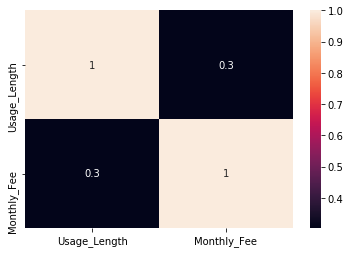

In [16]:
sns.heatmap(corr_df,annot = True)

In [17]:
#Create another data frame df2 which is a copy of df
df2 = df.copy()
df2.dtypes

User_Gender              category
Is_Senior                category
Has_Partner              category
Has_Children             category
Has_Phone_Service        category
Multiple_Lines           category
Intnet_Provider          category
Has_Security_Service     category
Has_Online_Backup        category
Has_Device_Protection    category
Has_Tech_Support         category
Has_Steam_TV             category
Has_Steam_Movies         category
Contract_Type            category
Has_Paperless_Billing    category
Payment_Method           category
Attrition                category
Usage_Length                int64
Monthly_Fee               float64
dtype: object

In [18]:
categorical = ['User_Gender','Is_Senior','Has_Partner','Has_Children','Has_Phone_Service','Multiple_Lines',
               'Intnet_Provider','Has_Security_Service','Has_Online_Backup','Has_Device_Protection','Has_Tech_Support',
               'Has_Steam_TV','Has_Steam_Movies','Contract_Type','Has_Paperless_Billing','Payment_Method','Attrition']
data = pd.get_dummies(df2, columns = categorical)
data

,Usage_Length,Monthly_Fee,User_Gender_F,User_Gender_M,Is_Senior_No,Is_Senior_Yes,Has_Partner_No,Has_Partner_Yes,Has_Children_No,Has_Children_Yes,...,Contract_Type_One year,Contract_Type_Two year,Has_Paperless_Billing_No,Has_Paperless_Billing_Yes,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Attrition_No,Attrition_Yes
0,2,63.77,0,1,1,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,1
1,26,60.07,1,0,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,1,0
2,18,13.40,1,0,1,0,0,1,1,0,...,0,1,1,0,0,0,0,1,1,0
3,7,34.00,0,1,1,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,1
4,5,59.67,0,1,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,57,39.73,0,1,1,0,0,1,0,1,...,1,0,1,0,0,0,0,1,1,0
696,54,73.17,0,1,1,0,0,1,1,0,...,0,1,1,0,1,0,0,0,0,1
697,27,13.23,0,1,1,0,1,0,1,0,...,0,1,1,0,0,1,0,0,1,0
698,67,68.63,1,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1


In [19]:
df2 = data.drop(['User_Gender_F', 'Is_Senior_Yes','Has_Partner_Yes','Has_Children_Yes','Has_Paperless_Billing_Yes','Attrition_Yes',
                'Has_Phone_Service_Yes'], axis=1)
df2.head()

,Usage_Length,Monthly_Fee,User_Gender_M,Is_Senior_No,Has_Partner_No,Has_Children_No,Has_Phone_Service_No,Multiple_Lines_No,Multiple_Lines_No phone service,Multiple_Lines_Yes,...,Has_Steam_Movies_No,Contract_Type_Month-to-month,Contract_Type_One year,Contract_Type_Two year,Has_Paperless_Billing_No,Payment_Method_Bank transfer (automatic),Payment_Method_Credit card (automatic),Payment_Method_Electronic check,Payment_Method_Mailed check,Attrition_No
0,2,63.77,1,1,1,1,0,1,0,0,...,1,1,0,0,1,0,0,1,0,0
1,26,60.07,0,1,0,1,0,0,0,1,...,1,0,1,0,0,0,1,0,0,1
2,18,13.40,0,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,1,1
3,7,34.00,1,1,1,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,5,59.67,1,0,1,1,0,1,0,0,...,1,1,0,0,0,0,0,1,0,0


# Split the data(the first 80% samples for training and the rest 20% samples for testing)

In [110]:
y = df2.Attrition_No  #define the target variable (dependent variable) as y

X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=0)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(560, 38) (560,)
(140, 38) (140,)


# Logistic Regression Model Fitting

In [99]:
## Logistic Regression Model Fitting
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\Admin\Desktop\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
# Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 25   0]
 [  0 115]]


In [67]:
from sklearn.metrics import classification_report
classifi_report= classification_report(y_test, y_pred)
print(classifi_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00       115

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



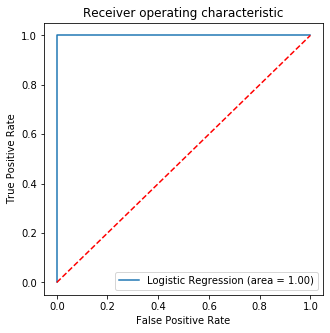

In [68]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# ANN

In [86]:
#!pip install keras
#!pip install --upgrade keras
#!pip install tensorflow
#import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense

In [111]:
# Nural Network
# adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(units=19, kernel_initializer='glorot_uniform', activation='relu', input_dim=38))

# adding the second hidden layer
classifier.add(Dense(units=19, kernel_initializer='glorot_uniform',  activation='relu'))

# adding output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [112]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'] )

In [113]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
6/6 [==============================] - 0s 2ms/step - loss: 7.7198 - accuracy: 0.2411
Epoch 2/150
6/6 [==============================] - 0s 2ms/step - loss: 5.2200 - accuracy: 0.2286
Epoch 3/150
6/6 [==============================] - 0s 2ms/step - loss: 3.2197 - accuracy: 0.2607
Epoch 4/150
6/6 [==============================] - 0s 2ms/step - loss: 1.6968 - accuracy: 0.4036
Epoch 5/150
6/6 [==============================] - 0s 3ms/step - loss: 1.0206 - accuracy: 0.6679
Epoch 6/150
6/6 [==============================] - 0s 1ms/step - loss: 0.9038 - accuracy: 0.7375
Epoch 7/150
6/6 [==============================] - 0s 2ms/step - loss: 0.7820 - accuracy: 0.7375
Epoch 8/150
6/6 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.7375
Epoch 9/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7339
Epoch 10/150
6/6 [==============================] - 0s 2ms/step - loss: 0.4623 - accuracy: 0.8018
Epoch 11/150
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.2853 - accuracy: 0.8875
Epoch 85/150
6/6 [==============================] - 0s 1ms/step - loss: 0.2823 - accuracy: 0.8839
Epoch 86/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2806 - accuracy: 0.8857
Epoch 87/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.8929
Epoch 88/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8875
Epoch 89/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2733 - accuracy: 0.8911
Epoch 90/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2703 - accuracy: 0.8857
Epoch 91/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9018
Epoch 92/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2624 - accuracy: 0.9036
Epoch 93/150
6/6 [==============================] - 0s 2ms/step - loss: 0.2596 - accuracy: 0.8982
Epoch 94/150
6/6 [===============

In [117]:
# Pridicting the Test set results
y_pred = classifier.predict(X_test)
#y_pred = (y_pred > 0.5)

In [127]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, a)

TypeError: 'numpy.ndarray' object is not callable